In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import datetime as dt

In [117]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
data_dict=pd.read_excel('Data Dictionary.xlsx')

In [4]:
data_dict

,Variable Name,Description,Unnamed: 2
0,UniqueID,Identifier for customers,NaN
1,loan_default,Payment default in the first EMI on due date,NaN
2,disbursed_amount,Amount of Loan disbursed,NaN
3,asset_cost,Cost of the Asset,NaN
4,ltv,Loan to Value of the asset,NaN
5,branch_id,Branch where the loan was disbursed,NaN
6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,Current_pincode,Current pincode of the customer,NaN
9,Date.of.Birth,Date of birth of the customer,NaN


In [5]:
train_data.shape,test_data.shape

((233154, 41), (112392, 40))

In [6]:
train_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [7]:
# separating numericals and categorical
cat=[]
num=[]
for column in train_data.columns:
    if (train_data[column].dtype=="object")|(len(train_data[column].unique())<=30):
        cat.append(column)
    else:
        num.append(column)
new_train_cat=train_data.loc[:,cat]
new_train_num=train_data.loc[:,num]

In [8]:
new_train_num.shape

(233154, 20)

In [9]:
default = pd.DataFrame(train_data['loan_default'])

In [10]:
new_data=pd.concat([new_train_num,default],axis=1)

In [11]:
new_data.shape

(233154, 21)

In [12]:
#train_data["disbursed_amount"].value_counts().plot(kind='barh',figsize=(6,4),color='blue',fontsize=13)

## Numerical variables examine

In [13]:
#checking the correlation of numericals
# checking correlation by adding predictor to numerical variables
corr = new_data.corr()

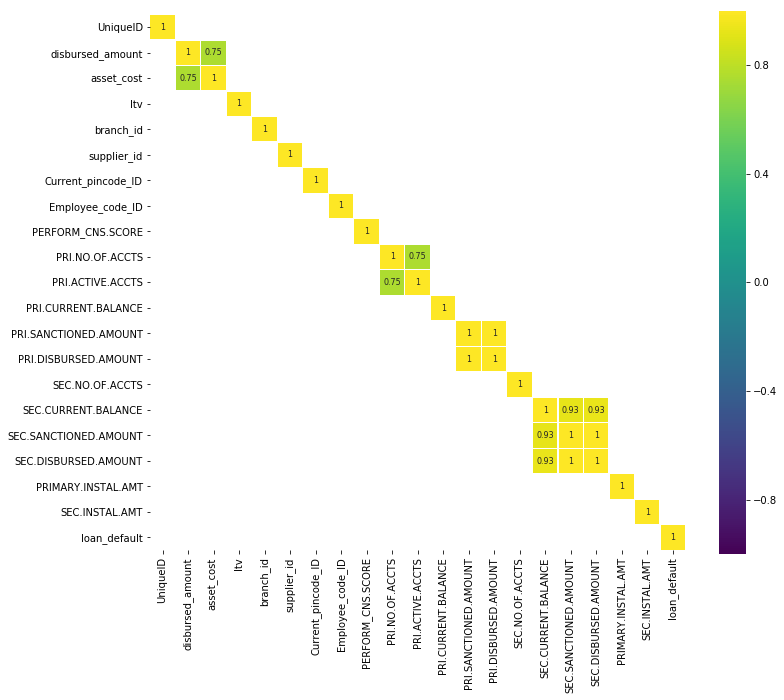

In [14]:
import seaborn as sns
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

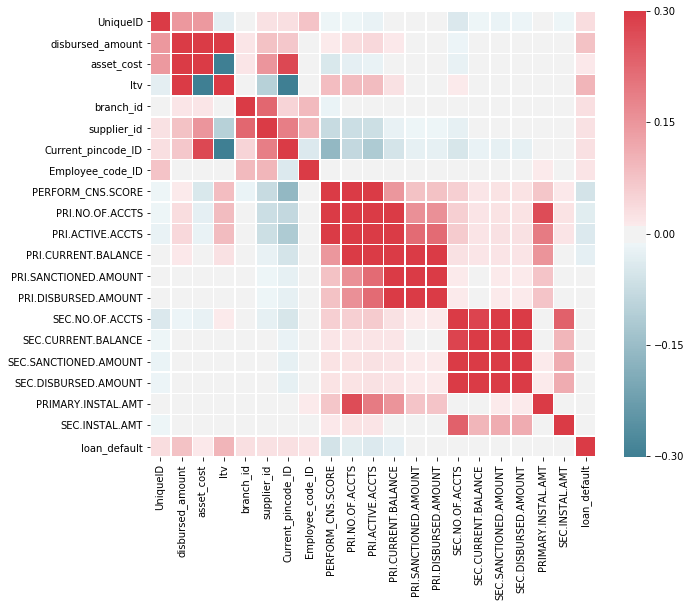

In [15]:
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(220,10,as_cmap=True) #220 is for height and 10 is for width
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap=cmap,vmax=.3,center=0,
            square=True,linewidths=0.5,cbar_kws={'shrink':.82})

In [16]:
new_data.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,Current_pincode_ID,Employee_code_ID,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,...,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,loan_default
UniqueID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,0.030500,0.075983,-0.014016,-0.013584,...,-0.007259,-0.002910,-0.002563,-0.044180,-0.013428,-0.017114,-0.016857,-0.009321,-0.013518,0.033848
disbursed_amount,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.068540,0.010120,0.011409,0.034461,...,0.015713,0.006294,0.006412,-0.014916,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.077675
asset_cost,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,0.275878,0.008711,-0.047398,-0.026798,...,-0.004356,-0.001180,-0.001221,-0.022600,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,0.014261
ltv,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,-0.300112,0.004940,0.084993,0.086571,...,0.026714,0.009955,0.010177,0.013019,0.007195,0.008800,0.008733,0.007358,0.000481,0.098208
branch_id,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,0.048192,0.088764,-0.018049,-0.010384,...,-0.004133,-0.003370,-0.003412,-0.003194,0.001418,0.002404,0.002457,0.004955,0.004265,0.030193
supplier_id,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,0.187401,0.095792,-0.077029,-0.070536,...,-0.022582,-0.012959,-0.012950,-0.025809,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,0.027357
Current_pincode_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,1.000000,-0.042609,-0.161664,-0.084687,...,-0.055948,-0.025843,-0.025697,-0.051766,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,0.028419
Employee_code_ID,0.075983,0.010120,0.008711,0.004940,0.088764,0.095792,-0.042609,1.000000,-0.005767,0.009197,...,0.003528,-0.001105,-0.001088,-0.001385,-0.003543,-0.002259,-0.002224,0.013470,0.001894,0.020657
PERFORM_CNS.SCORE,-0.014016,0.011409,-0.047398,0.084993,-0.018049,-0.077029,-0.161664,-0.005767,1.000000,0.424574,...,0.147822,0.079102,0.078451,0.056729,0.020128,0.024365,0.023953,0.071309,0.015655,-0.057929
PRI.NO.OF.ACCTS,-0.013584,0.034461,-0.026798,0.086571,-0.010384,-0.070536,-0.084687,0.009197,0.424574,1.000000,...,0.302673,0.158455,0.157952,0.056434,0.020945,0.024877,0.024551,0.269546,0.023421,-0.035456


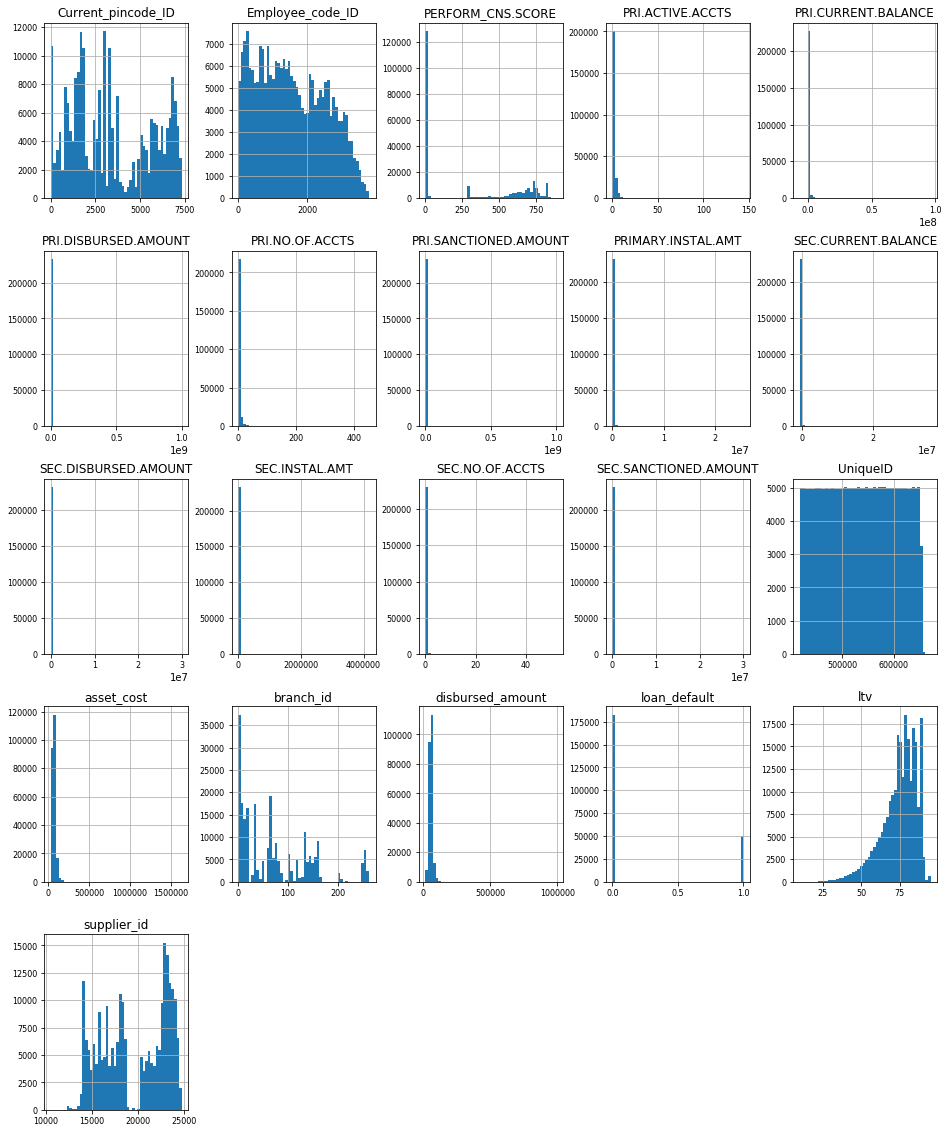

In [17]:
new_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 
# ; avoid having the matplotlib verbose informations

for i in range(0, len(new_data.columns), 5):
    sns.pairplot(data=new_data,
                x_vars=new_data.columns[i:i+5],
                y_vars=['loan_default'])

### catgorical variables examine

In [18]:
new_train_cat.head()

,manufacturer_id,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,45,01-01-84,Salaried,03-08-18,6,1,1,0,0,0,...,No Bureau History Available,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,45,31-07-85,Self employed,26-09-18,6,1,1,0,0,0,...,I-Medium Risk,1,0,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,45,24-08-85,Self employed,01-08-18,6,1,1,0,0,0,...,No Bureau History Available,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,45,30-12-93,Self employed,26-10-18,6,1,1,0,0,0,...,L-Very High Risk,0,0,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,45,09-12-77,Self employed,26-09-18,6,1,1,0,0,0,...,No Bureau History Available,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [19]:
new_train_cat["Date.of.Birth"]=pd.to_datetime(new_train_cat["Date.of.Birth"],format='%d-%m-%y')

In [20]:
new_train_cat["DisbursalDate"]=pd.to_datetime(new_train_cat['DisbursalDate'],format='%d-%m-%y')

In [21]:
new_train_cat['AGE']=dt.datetime.now().year-new_train_cat["Date.of.Birth"].dt.year

In [22]:
today_month=dt.datetime.now().month
#train['DisbursedMonth']=(today_month-train['DisbursalDate'].dt.month)+12

In [23]:
today_month

4

In [24]:
new_train_cat["DisbursalDate"].dtype

dtype('<M8[ns]')

In [25]:
new_train_cat['DisbursedMonth']=(today_month-new_train_cat['DisbursalDate'].dt.month)+12

In [26]:
new_train=new_train_cat.drop(['Date.of.Birth','DisbursalDate','loan_default'],axis=1)
new_train.columns

Index(['manufacturer_id', 'Employment.Type', 'State_ID', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.OVERDUE.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'AGE', 'DisbursedMonth'],
      dtype='object')

In [27]:
new_data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'Current_pincode_ID', 'Employee_code_ID',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'loan_default'],
      dtype='object')

In [28]:
new_train.shape,new_data.shape

((233154, 20), (233154, 21))

In [29]:
new_train.head()

,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,AGE,DisbursedMonth
0,45,Salaried,6,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,35,8
1,45,Self employed,6,1,1,0,0,0,0,I-Medium Risk,1,0,0,0,1,1yrs 11mon,1yrs 11mon,0,34,7
2,45,Self employed,6,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,34,8
3,45,Self employed,6,1,1,0,0,0,0,L-Very High Risk,0,0,0,0,0,0yrs 8mon,1yrs 3mon,1,26,6
4,45,Self employed,6,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,42,7


In [30]:
new_train.isnull().sum()

manufacturer_id                           0
Employment.Type                        7661
State_ID                                  0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.OVERDUE.ACCTS                         0
SEC.ACTIVE.ACCTS                          0
SEC.OVERDUE.ACCTS                         0
NEW.ACCTS.IN.LAST.SIX.MONTHS              0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS       0
AVERAGE.ACCT.AGE                          0
CREDIT.HISTORY.LENGTH                     0
NO.OF_INQUIRIES                           0
AGE                                       0
DisbursedMonth                            0
dtype: int64

In [31]:
new_train.dtypes

manufacturer_id                         int64
Employment.Type                        object
State_ID                                int64
MobileNo_Avl_Flag                       int64
Aadhar_flag                             int64
PAN_flag                                int64
VoterID_flag                            int64
Driving_flag                            int64
Passport_flag                           int64
PERFORM_CNS.SCORE.DESCRIPTION          object
PRI.OVERDUE.ACCTS                       int64
SEC.ACTIVE.ACCTS                        int64
SEC.OVERDUE.ACCTS                       int64
NEW.ACCTS.IN.LAST.SIX.MONTHS            int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS     int64
AVERAGE.ACCT.AGE                       object
CREDIT.HISTORY.LENGTH                  object
NO.OF_INQUIRIES                         int64
AGE                                     int64
DisbursedMonth                          int64
dtype: object

In [32]:
# imputing missing values of employe type with mode
new_train['Employment.Type'].fillna(new_train['Employment.Type'].mode()[0],inplace=True)

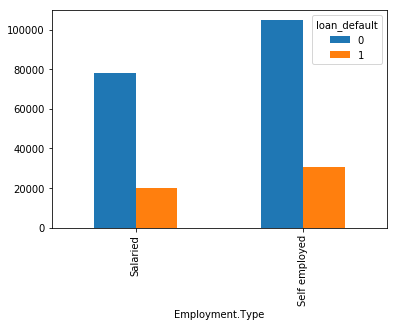

In [33]:
loan_emp=pd.crosstab(new_train['Employment.Type'],new_data['loan_default'])
loan_emp.plot(kind='bar')

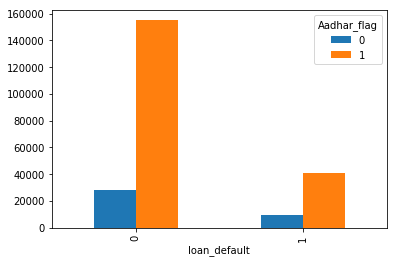

In [34]:
loan_adhar=pd.crosstab(new_data['loan_default'],new_train['Aadhar_flag'])
loan_adhar.plot(kind='bar')

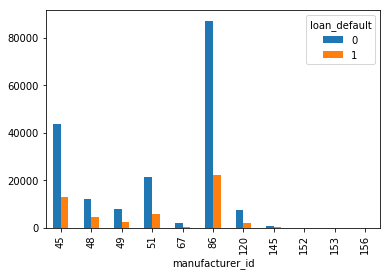

In [35]:
loan_manufacturer=pd.crosstab(new_train['manufacturer_id'],new_data['loan_default'])
loan_manufacturer.plot(kind='bar')

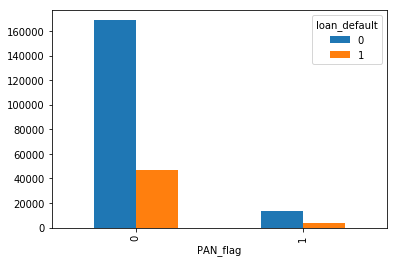

In [36]:
loan_pan=pd.crosstab(new_train['PAN_flag'],new_data['loan_default'])
loan_pan.plot(kind='bar')

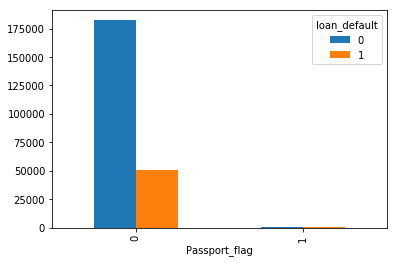

In [37]:
loan_passport=pd.crosstab(new_train['Passport_flag'],new_data['loan_default'])
loan_passport.plot(kind='bar')

(array([182543.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  50611.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

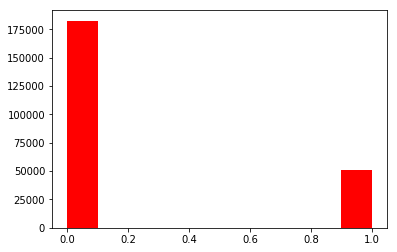

In [38]:
import seaborn as sns

plt.hist(new_data['loan_default'],color='red')

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [40]:
new_train['PERFORM_CNS.SCORE.DESCRIPTION'] = le.fit_transform(new_train[['PERFORM_CNS.SCORE.DESCRIPTION']])

C:\Users\paarthiv\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
#changing cat of month and credit to number
MONTH=[]
for i in range (len(new_train["AVERAGE.ACCT.AGE"])):
    MONTH.append((int(new_train['AVERAGE.ACCT.AGE'][i].split(" ")[0][:-3])*12)+int(new_train['AVERAGE.ACCT.AGE'][i].split(" ")[1][:-3]))
CREDIT=[]
for i in range (len(new_train["AVERAGE.ACCT.AGE"])):
    CREDIT.append((int(new_train['CREDIT.HISTORY.LENGTH'][i].split(" ")[0][:-3])*12)+int(new_train['CREDIT.HISTORY.LENGTH'][i].split(" ")[1][:-3]))
new_train["AVERAGE.ACCT.AGE"]=MONTH
new_train['CREDIT.HISTORY.LENGTH']=CREDIT

In [42]:
new_train['Employment.Type']=new_train["Employment.Type"].replace({'Self employed':0,'Salaried':1})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016A8F003940>,
      dtype=object)

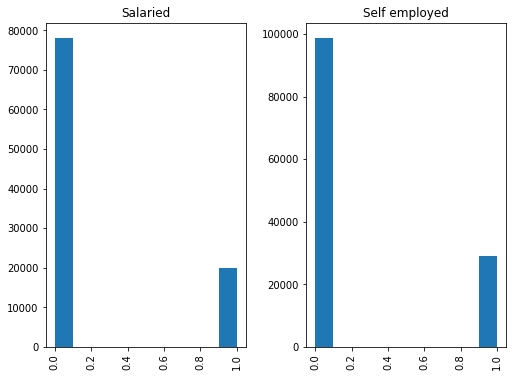

In [43]:
#Side by Side boxplot
# compare in categorial and numeriacal we are using box plot
train_data.hist(column="loan_default",figsize=(8,6),
             by="Employment.Type",
             grid=False, # to get notch means the mean look clear in boxplot
             )

In [ ]:
train_data.hist(column="disbursed_amount",figsize=(8,6),
             by="Employment.Type",color='pink',
             grid=False, # to get notch means the mean look clear in boxplot
             )

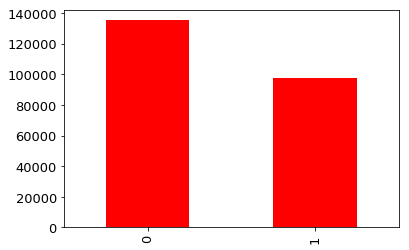

In [44]:
new_train["Employment.Type"].value_counts().plot(kind='bar',figsize=(6,4),color='red',fontsize=13)

In [45]:
# after doing EDA analysing creating a new set by using concat after categorical variables to
#numericals

train1=pd.concat([new_data,new_train],axis=1)
train1.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,Current_pincode_ID,Employee_code_ID,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,...,PRI.OVERDUE.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,AGE,DisbursedMonth
0,420825,50578,58400,89.55,67,22807,1441,1998,0,0,...,0,0,0,0,0,0,0,0,35,8
1,537409,47145,65550,73.23,67,22807,1502,1998,598,1,...,1,0,0,0,1,23,23,0,34,7
2,417566,53278,61360,89.63,67,22807,1497,1998,0,0,...,0,0,0,0,0,0,0,0,34,8
3,624493,57513,66113,88.48,67,22807,1501,1998,305,3,...,0,0,0,0,0,8,15,1,26,6
4,539055,52378,60300,88.39,67,22807,1495,1998,0,0,...,0,0,0,0,0,0,0,1,42,7


# Decision tree for only numerical variables

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score,roc_curve,auc
from sklearn.model_selection import train_test_split

In [47]:
new_data.shape

(233154, 21)

In [48]:
x_train = new_data.drop(['loan_default'],axis=1)

In [49]:
y_train=new_data['loan_default']

In [50]:
x_train.shape,y_train.shape

((233154, 20), (233154,))

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.3,random_state=1234)

In [52]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((163207, 20), (163207,), (69947, 20), (69947,))

In [53]:
model1 = DecisionTreeClassifier()

In [54]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
predict_tree = model1.predict(X_test)

In [56]:
accuracy_score(Y_test,predict_tree)

0.6713797589603557

In [57]:
cohen_kappa_score(Y_test,predict_tree)

0.0608795168860129

In [58]:
import sklearn.metrics as metrics

In [59]:
probs = model1.predict_proba(X_test)

In [60]:
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

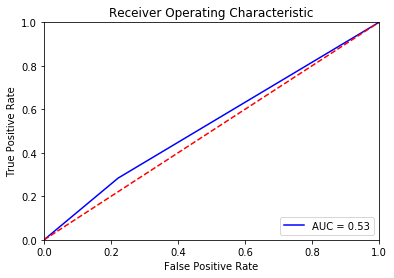

In [61]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [62]:
roc=metrics.roc_curve(Y_test,predict_tree)
roc

(array([0.        , 0.22110011, 1.        ]),
 array([0.        , 0.28375798, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [63]:
# applying randomforest by remiving some variable new created traing set of data
import xgboost
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,RandomForestClassifier

C:\Users\paarthiv\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [64]:
train1.columns,train1.shape

(Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
        'supplier_id', 'Current_pincode_ID', 'Employee_code_ID',
        'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
        'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
        'SEC.NO.OF.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
        'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
        'loan_default', 'manufacturer_id', 'Employment.Type', 'State_ID',
        'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
        'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE.DESCRIPTION',
        'PRI.OVERDUE.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
        'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
        'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'AGE',
        'DisbursedMonth'],
       dtype='object'), (233154, 41))

In [65]:
train1.drop(['PERFORM_CNS.SCORE','PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS'],axis=1).head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,Current_pincode_ID,Employee_code_ID,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,PRI.OVERDUE.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,AGE,DisbursedMonth
0,420825,50578,58400,89.55,67,22807,1441,1998,0,0,...,0,0,0,0,0,0,0,0,35,8
1,537409,47145,65550,73.23,67,22807,1502,1998,27600,50200,...,1,0,0,0,1,23,23,0,34,7
2,417566,53278,61360,89.63,67,22807,1497,1998,0,0,...,0,0,0,0,0,0,0,0,34,8
3,624493,57513,66113,88.48,67,22807,1501,1998,0,0,...,0,0,0,0,0,8,15,1,26,6
4,539055,52378,60300,88.39,67,22807,1495,1998,0,0,...,0,0,0,0,0,0,0,1,42,7


In [66]:
X=train1.drop(['loan_default','PERFORM_CNS.SCORE','PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS'],axis=1)


In [67]:
y=train1['loan_default']

In [68]:
X.shape,y.shape

((233154, 37), (233154,))

In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

In [70]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((163207, 37), (163207,), (69947, 37), (69947,))

#### Randomforest_baggedeclassifier

In [71]:
rf_base=RandomForestClassifier()

In [72]:
rf_bagged=BaggingClassifier(base_estimator=rf_base,n_estimators=10,random_state=1234)

In [73]:
rf_bagged

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=1234, verbose=0, warm_start=False)

In [74]:
rf_bagged.fit(X=X_train,y=Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=1234, verbose=0, warm_start=False)

In [75]:
pred_rf_bagged=rf_bagged.predict(X=X_test)

In [76]:
accuracy_score(Y_test,pred_rf_bagged)

0.7833216578266402

In [77]:
cohen_kappa_score(Y_test,pred_rf_bagged)

0.031988184733434344

In [78]:
probs1 = rf_bagged.predict_proba(X_test)

In [79]:
preds1 = probs1[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds1)
roc_auc1 = metrics.auc(fpr, tpr)

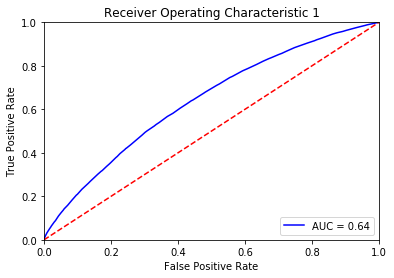

In [80]:
plt.title('Receiver Operating Characteristic 1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### XG BOOST CLASSIFIER

In [81]:
xgb_class = xgboost.XGBClassifier()

In [82]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [ ]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

In [83]:
xgb_class_cv = GridSearchCV(xgb_class, param_grid={'n_estimators':[100,200,300,400,500]}, n_jobs = -1)

In [ ]:
# xgb_class_CV =xgboost.XGBClassifier(xgb_class,n_estimators=10,random_state=1234)

In [85]:
xgb_class_cv.fit(X=X_train,y=Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [86]:
pred_xgb=xgb_class_cv.predict(X=X_test)

C:\Users\paarthiv\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [87]:
accuracy_score(Y_test,pred_xgb)

0.7832644716714083

In [88]:
cohen_kappa_score(Y_test,pred_xgb)

0.005280587205921727

In [90]:
probs2 =xgb_class_cv.predict_proba(X_test)

In [91]:
preds2 = probs2[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds2)
roc_auc2 = metrics.auc(fpr, tpr)

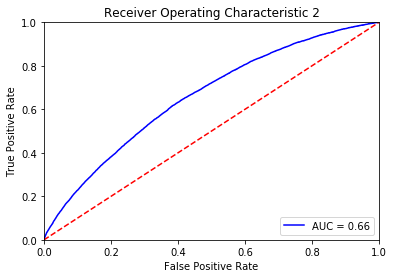

In [92]:
plt.title('Receiver Operating Characteristic 2')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### ADAboosting

In [93]:
adaboost = AdaBoostClassifier()



In [94]:
adaboost_CV = GridSearchCV(adaboost, param_grid={'n_estimators':[300,400,500,1000], 'learning_rate':[0.4,0.5,0.6,0.7,0.8]},n_jobs=-1)

In [95]:
adaboost_CV.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 400, 500, 1000], 'learning_rate': [0.4, 0.5, 0.6, 0.7, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [97]:
pred_adaboost = adaboost_CV.predict(X=X_test)

In [98]:
accuracy_score(Y_test,pred_adaboost)

0.7831929889773686

In [99]:
cohen_kappa_score(Y_test,pred_adaboost)

0.012030151979433024

In [100]:
probs3 =adaboost_CV.predict_proba(X_test)

In [103]:
preds3 = probs3[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds3)
roc_auc3 = metrics.auc(fpr, tpr)

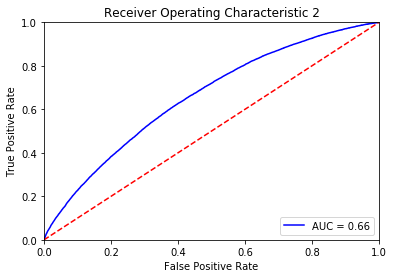

In [104]:
plt.title('Receiver Operating Characteristic 2')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Test data

In [118]:
test_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [121]:
test_cat=[]
test_num=[]
for column in test_data.columns:
    if (test_data[column].dtype=="object")|(len(test_data[column].unique())<=30):
        test_cat.append(column)
    else:
        test_num.append(column)
new_test_cat=test_data.loc[:,test_cat]
new_test_num=test_data.loc[:,test_num]

In [122]:
new_test_cat.shape,new_test_num.shape

((112392, 21), (112392, 19))

In [123]:
new_test_cat.dtypes

manufacturer_id                         int64
Date.of.Birth                          object
Employment.Type                        object
DisbursalDate                          object
State_ID                                int64
MobileNo_Avl_Flag                       int64
Aadhar_flag                             int64
PAN_flag                                int64
VoterID_flag                            int64
Driving_flag                            int64
Passport_flag                           int64
PERFORM_CNS.SCORE.DESCRIPTION          object
PRI.OVERDUE.ACCTS                       int64
SEC.NO.OF.ACCTS                         int64
SEC.ACTIVE.ACCTS                        int64
SEC.OVERDUE.ACCTS                       int64
NEW.ACCTS.IN.LAST.SIX.MONTHS            int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS     int64
AVERAGE.ACCT.AGE                       object
CREDIT.HISTORY.LENGTH                  object
NO.OF_INQUIRIES                         int64
dtype: object

In [124]:
#checking the correlation of numericals
# checking correlation to numerical variables
corr1 = new_test_num.corr()

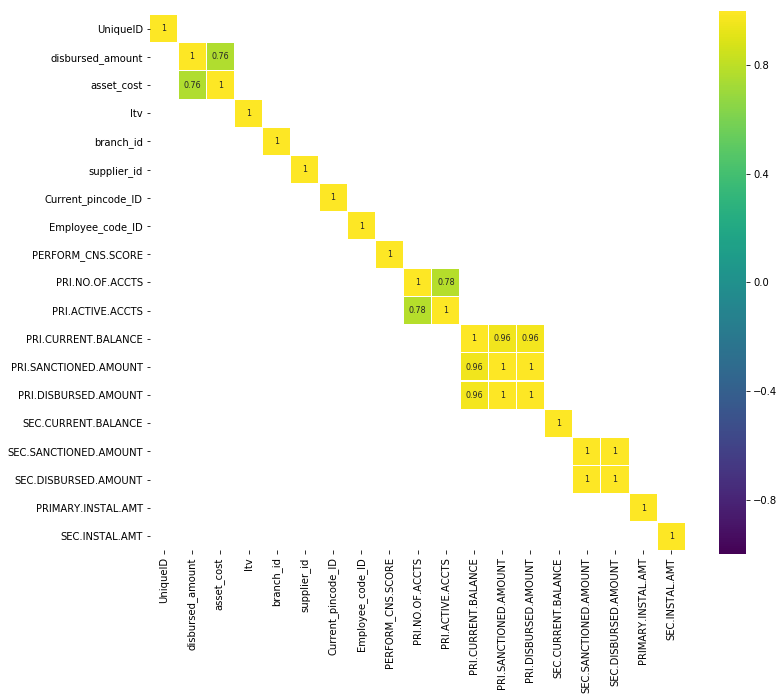

In [125]:
plt.figure(figsize=(12, 10))

sns.heatmap(corr1[(corr1 >= 0.5) | (corr1 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

##### test catgorical variables

In [126]:
new_test_cat.head()

,manufacturer_id,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,45,01-01-74,Salaried,03-11-18,6,1,1,0,0,0,...,No Bureau History Available,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,45,20-05-85,Self employed,20-11-18,6,1,1,0,0,0,...,C-Very Low Risk,0,0,0,0,1,0,0yrs 8mon,1yrs 0mon,1
2,86,14-10-95,Salaried,29-11-18,4,1,1,1,0,0,...,No Bureau History Available,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,45,01-06-73,Self employed,29-11-18,4,1,1,0,0,0,...,Not Scored: Only a Guarantor,1,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,45,01-06-72,Salaried,17-11-18,4,1,1,0,0,0,...,No Bureau History Available,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [127]:
new_test_cat["Date.of.Birth"]=pd.to_datetime(new_test_cat["Date.of.Birth"],format='%d-%m-%y')

In [128]:
new_test_cat["DisbursalDate"]=pd.to_datetime(new_test_cat['DisbursalDate'],format='%d-%m-%y')

In [129]:
new_test_cat['AGE']=dt.datetime.now().year-new_test_cat["Date.of.Birth"].dt.year

In [130]:
today_month=dt.datetime.now().month
#train['DisbursedMonth']=(today_month-train['DisbursalDate'].dt.month)+12

In [131]:
new_test_cat["DisbursalDate"].dtype

dtype('<M8[ns]')

In [132]:
new_test_cat['DisbursedMonth']=(today_month-new_test_cat['DisbursalDate'].dt.month)+12

In [134]:
new_test=new_test_cat.drop(['Date.of.Birth','DisbursalDate'],axis=1)
new_test.columns

Index(['manufacturer_id', 'Employment.Type', 'State_ID', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.OVERDUE.ACCTS',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'AGE',
       'DisbursedMonth'],
      dtype='object')

In [135]:
new_test.shape,new_test_num.shape

((112392, 21), (112392, 19))

In [136]:
new_test.isnull().sum()

manufacturer_id                           0
Employment.Type                        3443
State_ID                                  0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.OVERDUE.ACCTS                         0
SEC.NO.OF.ACCTS                           0
SEC.ACTIVE.ACCTS                          0
SEC.OVERDUE.ACCTS                         0
NEW.ACCTS.IN.LAST.SIX.MONTHS              0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS       0
AVERAGE.ACCT.AGE                          0
CREDIT.HISTORY.LENGTH                     0
NO.OF_INQUIRIES                           0
AGE                                       0
DisbursedMonth                            0
dtype: int64

In [137]:
# imputing missing values of employe type with mode
new_test['Employment.Type'].fillna(new_test['Employment.Type'].mode()[0],inplace=True)

In [138]:
new_test['PERFORM_CNS.SCORE.DESCRIPTION'] = le.fit_transform(new_test[['PERFORM_CNS.SCORE.DESCRIPTION']])

C:\Users\paarthiv\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
#changing cat of month and credit to number
MONTH=[]
for i in range (len(new_test["AVERAGE.ACCT.AGE"])):
    MONTH.append((int(new_test['AVERAGE.ACCT.AGE'][i].split(" ")[0][:-3])*12)+int(new_test['AVERAGE.ACCT.AGE'][i].split(" ")[1][:-3]))
CREDIT=[]
for i in range (len(new_test["AVERAGE.ACCT.AGE"])):
    CREDIT.append((int(new_test['CREDIT.HISTORY.LENGTH'][i].split(" ")[0][:-3])*12)+int(new_test['CREDIT.HISTORY.LENGTH'][i].split(" ")[1][:-3]))
new_test["AVERAGE.ACCT.AGE"]=MONTH
new_test['CREDIT.HISTORY.LENGTH']=CREDIT

In [140]:
new_test['Employment.Type']=new_test["Employment.Type"].replace({'Self employed':0,'Salaried':1})

In [143]:
new_test.dtypes

manufacturer_id                        int64
Employment.Type                        int64
State_ID                               int64
MobileNo_Avl_Flag                      int64
Aadhar_flag                            int64
PAN_flag                               int64
VoterID_flag                           int64
Driving_flag                           int64
Passport_flag                          int64
PERFORM_CNS.SCORE.DESCRIPTION          int64
PRI.OVERDUE.ACCTS                      int64
SEC.NO.OF.ACCTS                        int64
SEC.ACTIVE.ACCTS                       int64
SEC.OVERDUE.ACCTS                      int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    int64
AVERAGE.ACCT.AGE                       int64
CREDIT.HISTORY.LENGTH                  int64
NO.OF_INQUIRIES                        int64
AGE                                    int64
DisbursedMonth                         int64
dtype: object

In [144]:
new_test_num.dtypes

UniqueID                   int64
disbursed_amount           int64
asset_cost                 int64
ltv                      float64
branch_id                  int64
supplier_id                int64
Current_pincode_ID         int64
Employee_code_ID           int64
PERFORM_CNS.SCORE          int64
PRI.NO.OF.ACCTS            int64
PRI.ACTIVE.ACCTS           int64
PRI.CURRENT.BALANCE        int64
PRI.SANCTIONED.AMOUNT      int64
PRI.DISBURSED.AMOUNT       int64
SEC.CURRENT.BALANCE        int64
SEC.SANCTIONED.AMOUNT      int64
SEC.DISBURSED.AMOUNT       int64
PRIMARY.INSTAL.AMT         int64
SEC.INSTAL.AMT             int64
dtype: object

In [150]:
new_num=new_test_num.drop(['PERFORM_CNS.SCORE','PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS'],axis=1)

In [151]:
test1=pd.concat([new_num,new_test],axis=1)
test1.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,Current_pincode_ID,Employee_code_ID,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,AGE,DisbursedMonth
0,655269,53478,63558,86.54,67,22807,1497,1998,0,0,...,0,0,0,0,0,0,0,0,45,5
1,723482,55513,63163,89.45,67,22807,1497,1998,43898,48780,...,0,0,0,1,0,8,12,1,34,5
2,758529,65282,84320,79.93,78,23135,2071,1646,0,0,...,0,0,0,0,0,0,0,0,24,5
3,763449,46905,63896,76.58,78,17014,2070,1646,132480,255000,...,0,0,0,0,0,29,29,0,46,5
4,708663,51428,63896,86.08,78,17014,2069,1646,0,0,...,0,0,0,0,0,0,0,0,47,5


In [152]:
X_train.shape,test1.shape

((163207, 37), (112392, 37))

In [157]:
solution=adaboost_CV.predict(test1)
solution.shape

(112392,)

In [166]:
sample_submission=pd.read_csv('sample_submission.csv')

In [167]:
solution.shape,submission.shape

((112392,), (112392, 2))

In [174]:
#pred2 = pd.DataFrame(solutiontest1['UniqueID'])

In [175]:
#pred2.to_csv(r"C:\Users\paarthiv\Desktop\pred2.csv")

In [169]:
submission["UniqueID"]=test1["UniqueID"]
sample_submission["loan_default"]=solution

In [170]:
sample_submission.to_csv("Sample_Submission.csv",index=False)

In [171]:
pd.read_csv("Sample_Submission.csv")

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0
5,725530,0
6,708592,0
7,714975,0
8,712795,0
9,708656,0
